In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Sentiment Analysis.csv",encoding='latin1')

In [6]:
#sentence is positive when label=1 and negetive when label=0 on basis of rating
df.head()

,ï»¿text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [7]:
df.columns=["Text","Label"]

In [8]:
x=pd.DataFrame(df["Text"])
x.head()

,Text
0,I always wrote this series off as being a comp...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2,This movie was so poorly written and directed ...
3,The most interesting thing about Miryang (Secr...
4,"when i first read about ""berlin am meer"" i did..."


In [9]:
y=pd.DataFrame(df["Label"])
y.head()

,Label
0,0
1,0
2,0
3,1
4,0


In [10]:
#importing all neccessary libraries for nlp
import string
import nltk
import re

In [11]:
!pip install nltk

In [12]:
#removing punctuation
def remove_punc(txt):
  lst1="".join([i for i in txt if i not in string.punctuation])
  return lst1
df["Clean Text"]=df["Text"].apply(lambda x:remove_punc(x))

In [13]:
#tokenization
def tokenize(txt):
  lst2=re.split('\W+',txt)
  return lst2
#changing to lower as we need not deal with upper case
df["Clean Text"]=df["Clean Text"].apply(lambda x:tokenize(x.lower()))

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
sw=nltk.corpus.stopwords.words("english")
sw[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
#removing stop words
def remove_sw(txt):
  lst3=[i for i in txt if i not in sw]
  return lst3
df["Clean Text"]=df["Clean Text"].apply(lambda x:remove_sw(x))

In [21]:
#object storing a lemmatization function 
wn=nltk.WordNetLemmatizer()

In [19]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
#lemmatization
def lemmatizing(txt):
  lst4=[wn.lemmatize(i) for i in txt]
  return lst4
df["Clean Text"]=df["Clean Text"].apply(lambda x:lemmatizing(x))

In [22]:
#viewing the dataset after cleaning
df.head()

,Text,Label,Clean Text
0,I always wrote this series off as being a comp...,0,"[always, wrote, series, complete, stinkfest, j..."
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"[1st, watched, 1272002, 3, 10dirsteve, purcell..."
2,This movie was so poorly written and directed ...,0,"[movie, poorly, written, directed, fell, aslee..."
3,The most interesting thing about Miryang (Secr...,1,"[interesting, thing, miryang, secret, sunshine..."
4,"when i first read about ""berlin am meer"" i did...",0,"[first, read, berlin, meer, didnt, expect, muc..."


In [24]:
df.shape

(5000, 3)

In [25]:
df.isna().sum()

Text          0
Label         0
Clean Text    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        5000 non-null   object
 1   Label       5000 non-null   int64 
 2   Clean Text  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


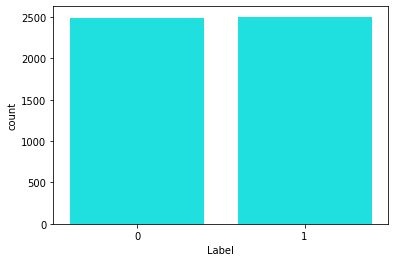

In [28]:
sns.countplot(x=df["Label"],color="cyan")

In [45]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
#analyzer takes a function value and passes each row to that function
cv=CountVectorizer(analyzer=lemmatizing)
cv.fit_transform(x)

<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [46]:
#now we will store the elements of features inside a variable x
x=cv.fit_transform(df["Clean Text"])
x=x.toarray()
x=pd.DataFrame(x)
#the dataset consists of fully numbers,since our ML model can not work with text data
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,46630,46631,46632,46633,46634,46635,46636,46637,46638,46639,46640,46641,46642,46643,46644,46645,46646,46647,46648,46649,46650,46651,46652,46653,46654,46655,46656,46657,46658,46659,46660,46661,46662,46663,46664,46665,46666,46667,46668,46669
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
y=pd.DataFrame(df["Label"])
y.head()

,Label
0,0
1,0
2,0
3,1
4,0


In [47]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression
model_lor=LogisticRegression()
model_lor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_preds_lor=model_lor.predict(x_test)
y_preds_lor

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [50]:
from sklearn.metrics import confusion_matrix
cm_lor=confusion_matrix(y_test,y_preds_lor)
cm_lor

array([[396,  93],
       [ 64, 447]])

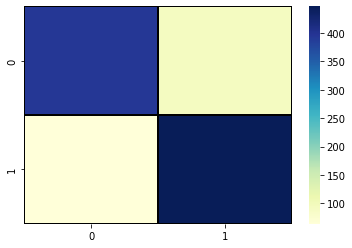

In [52]:
sns.heatmap(cm_lor,linewidth=1,linecolor="black",cmap="YlGnBu")

In [53]:
from sklearn.metrics import accuracy_score
acc_lor=accuracy_score(y_test,y_preds_lor)
acc_lor

0.843